# Basic Analysis of Spike Train Data

In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import scipy.io as sio    

np.set_printoptions(suppress=True)

## 1. Uploading the data 

We are expoloring a neural activity in a region of the hippocampus involved in functions such as spatial navigation, memory, and possibly anxiety-related behavior. Our data is filtered (in order to remove noise) and also sorted.

#### What does it mean that the spikes are sorted?

In many neuroscience experiments, electrodes are placed near neurons in brain tissue to record electrical activity. Each electrode typically picks up signals from multiple nearby neurons, making the recorded signal a mixture of spikes from multiple sources. Spike sorting is used to:

1. Identify individual spikes: Detect instances where neurons have fired action potentials.
2. Classify spikes by neuron: Separate these spikes into groups (or "clusters") corresponding to individual neurons.

In general when we say that the data are "sorted", it implies that the file contains spike trains for individual neurons rather than a continuous, mixed signal. 

In [2]:
file = "2022-01-20T15-00-00vHip1_big_filtered_sorted.mat"

#### Channel Structure:

Each entry represents data from a specific channel (Ch1, Ch10, ..., Ch264). This corresponds to the individual electrodes from a multi-electrode array used in neural recordings.

In [3]:
codes_dict = {}
comment_dict = {}
interval_dict = {}
item_dict = {}
length_dict = {}
offset_dict = {}
resolution_dict = {}
scale_dict = {}
times_dict = {}
title_dict = {}
traces_dict = {}
trigger_dict = {}
units_dict = {}
values_dict = {}


with h5py.File(file, 'r') as hdf:
    for key in hdf.keys():
        channel_data = hdf.get(key)
        
        # Storing data from each feature in respective dictionaries
        codes_dict[key] = np.array(channel_data.get('codes'))
        comment_dict[key] = np.array(channel_data.get('comment'))
        interval_dict[key] = np.array(channel_data.get('interval'))
        item_dict[key] = np.array(channel_data.get('item'))
        length_dict[key] = np.array(channel_data.get('length'))
        offset_dict[key] = np.array(channel_data.get('offset'))
        resolution_dict[key] = np.array(channel_data.get('resolution'))
        scale_dict[key] = np.array(channel_data.get('scale'))
        times_dict[key] = np.array(channel_data.get('times'))
        title_dict[key] = np.array(channel_data.get('title'))
        traces_dict[key] = np.array(channel_data.get('traces'))
        trigger_dict[key] = np.array(channel_data.get('trigger'))
        units_dict[key] = np.array(channel_data.get('units'))
        values_dict[key] = np.array(channel_data.get('values'))

We'll focus on the times dictionary, which provides the timestamps of spikes occurring in given electrode.

## 2. Timestamps analysis 

In [4]:
print(len(times_dict.keys()))

50


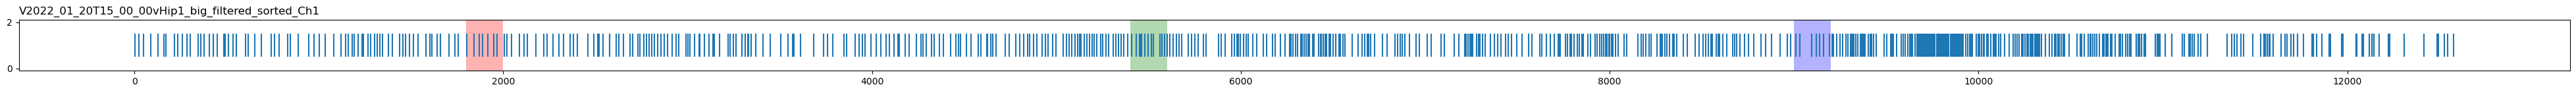

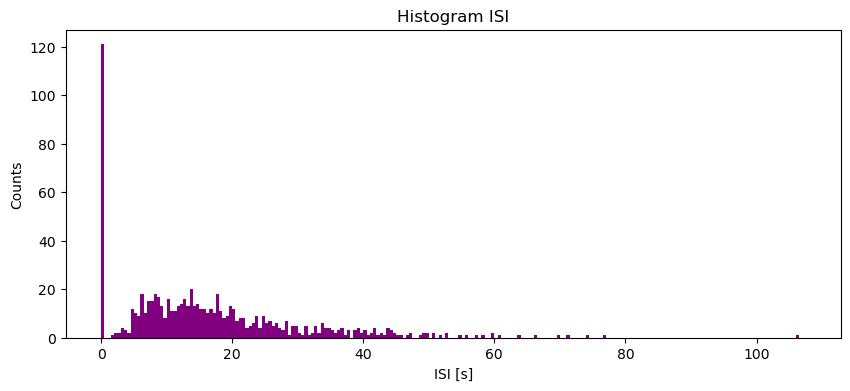

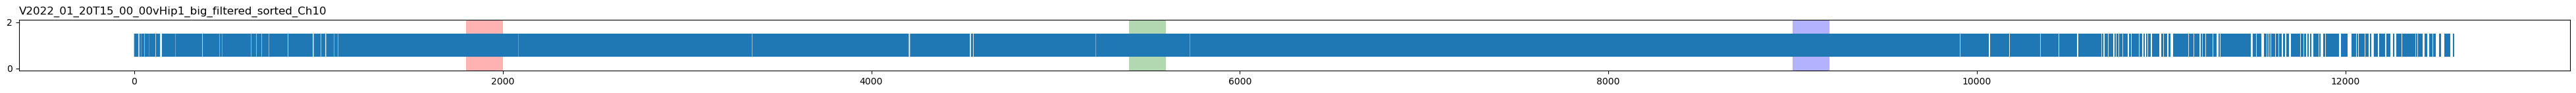

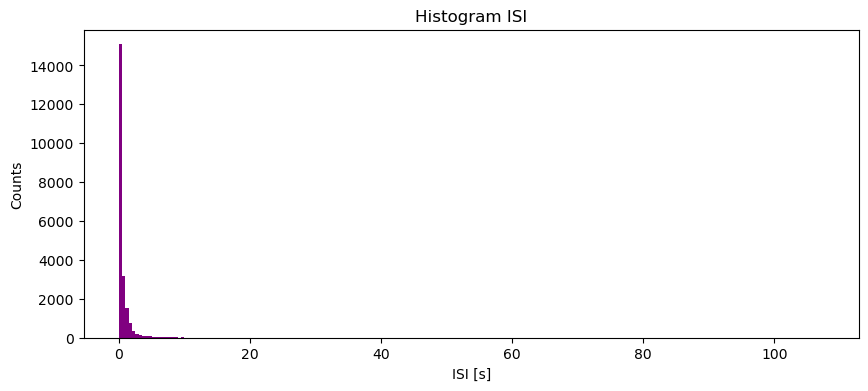

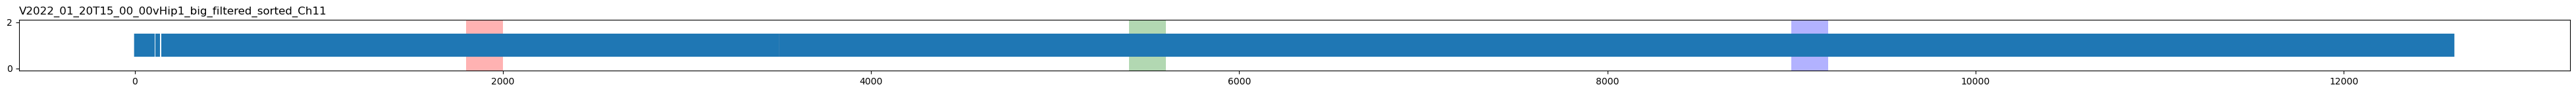

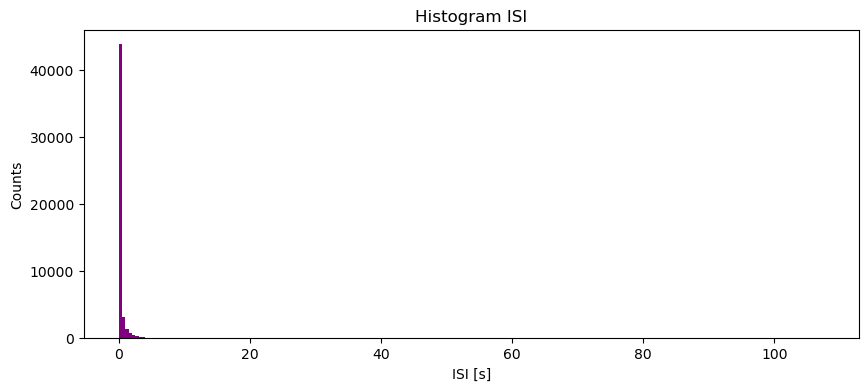

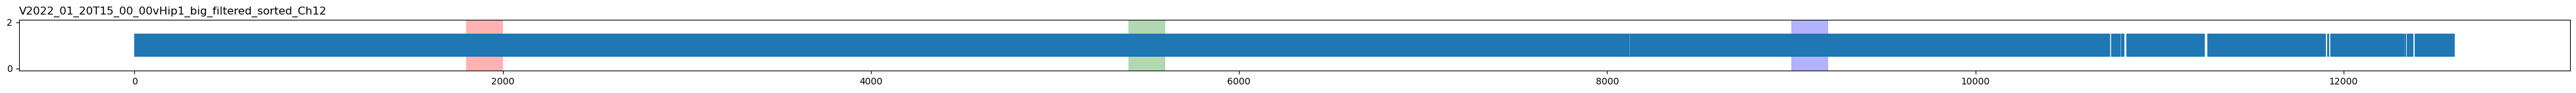

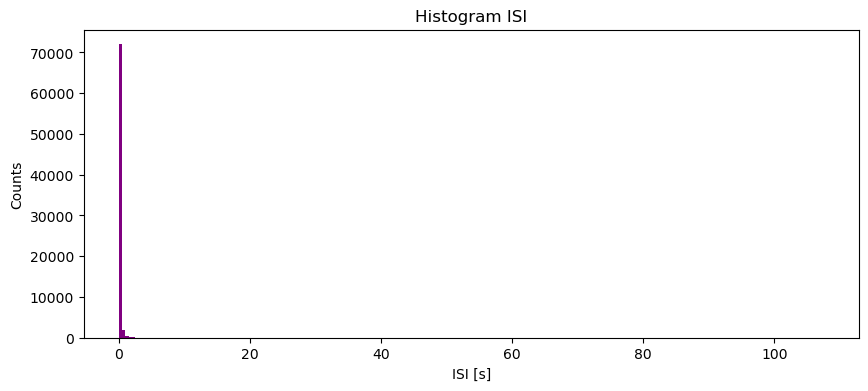

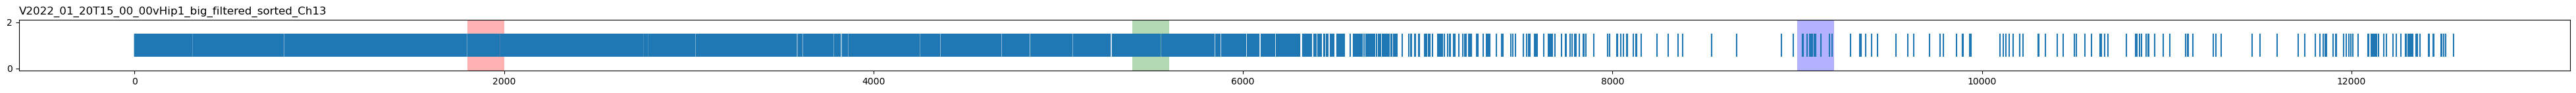

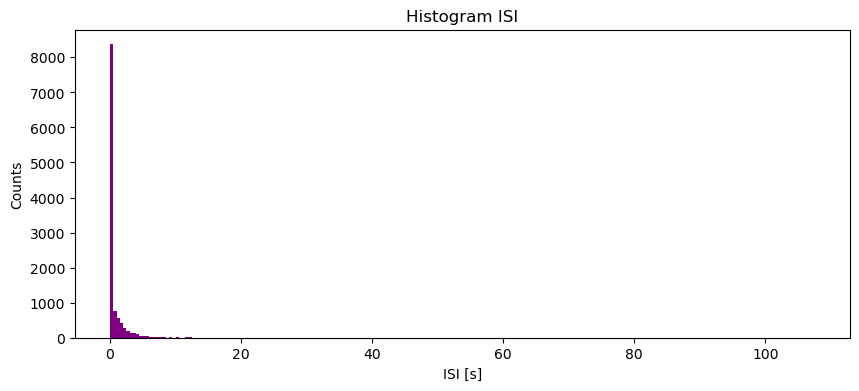

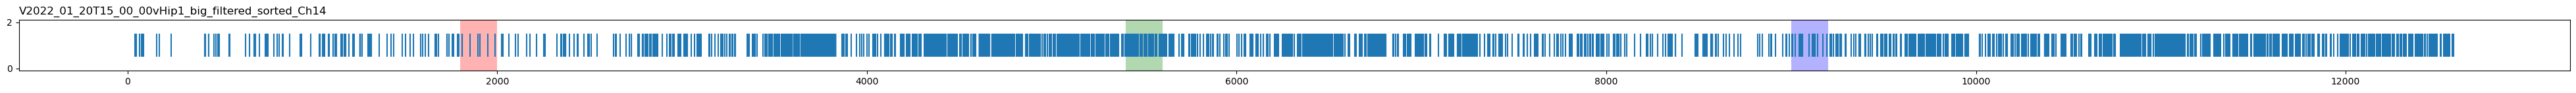

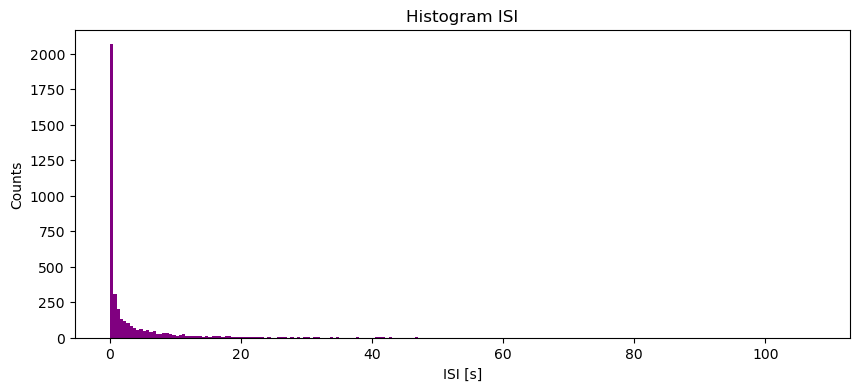

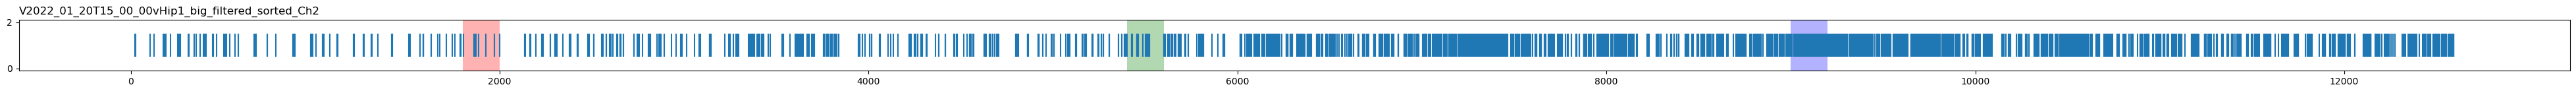

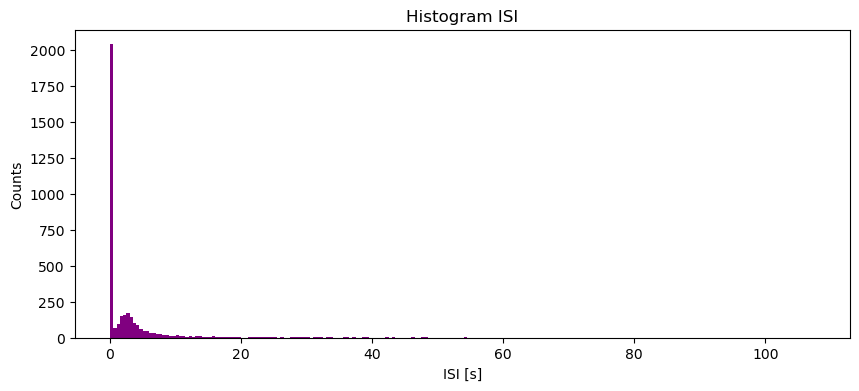

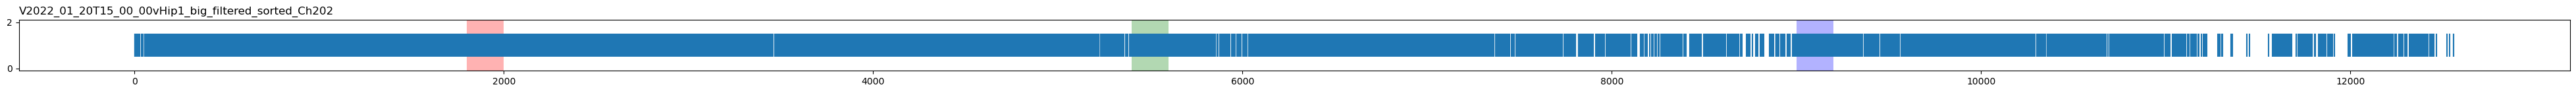

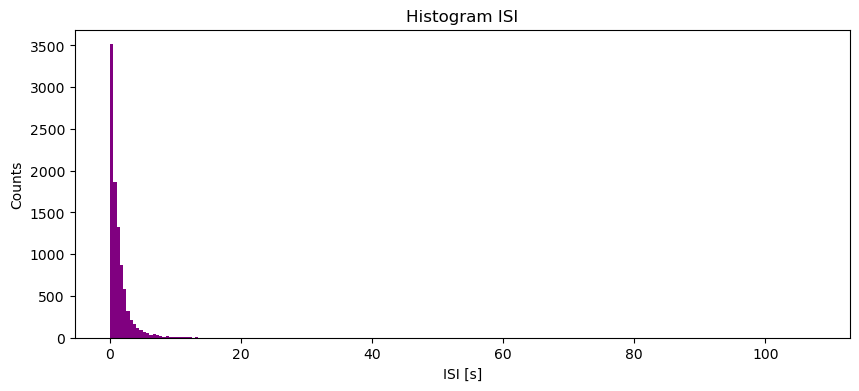

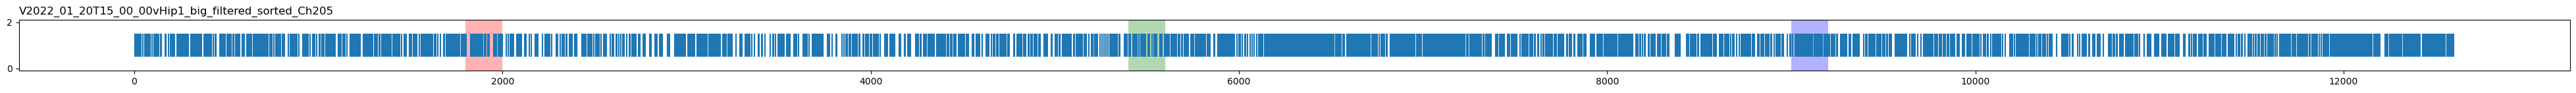

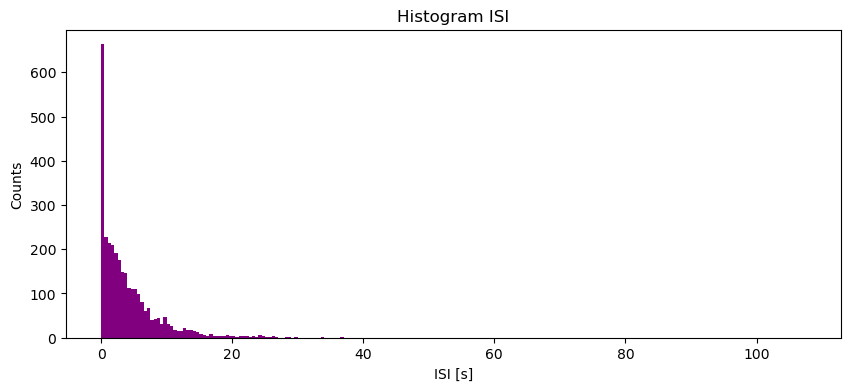

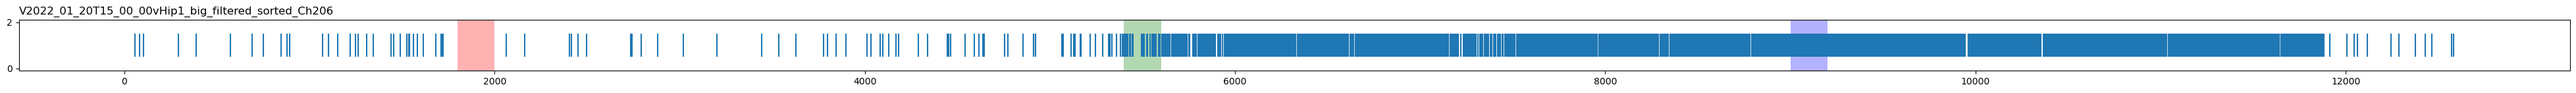

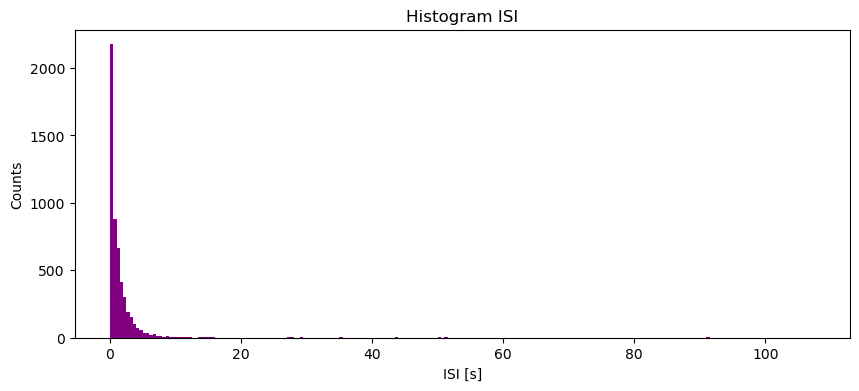

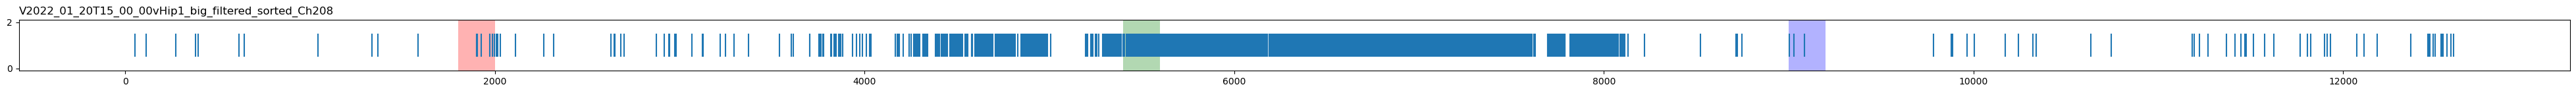

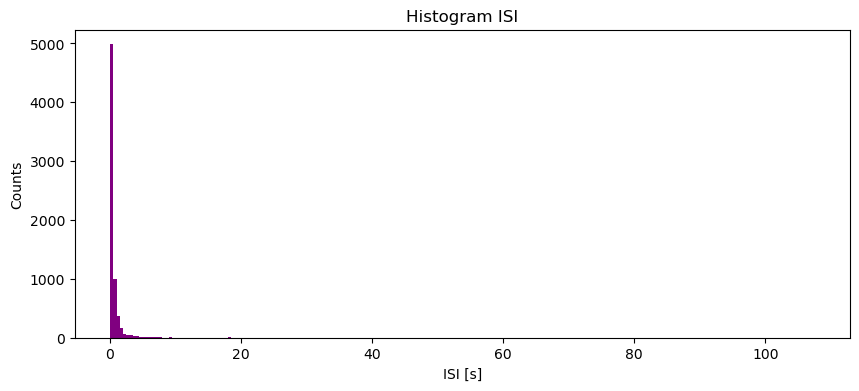

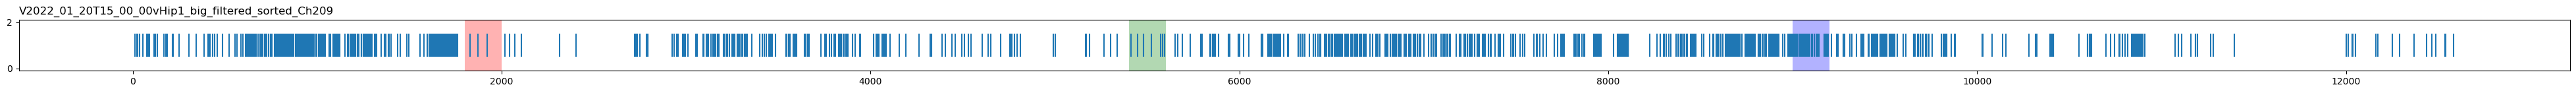

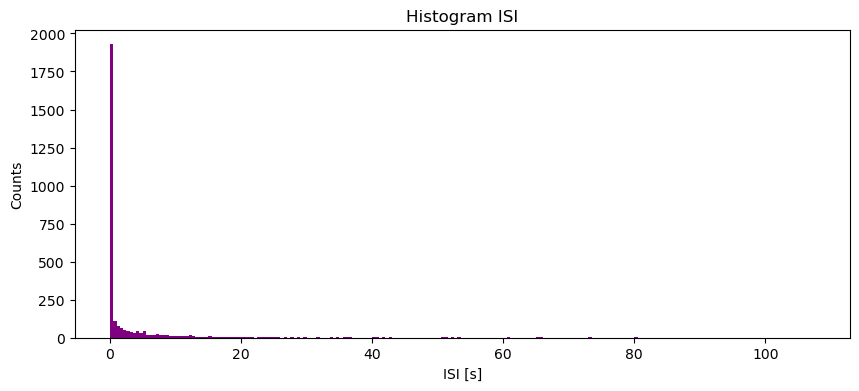

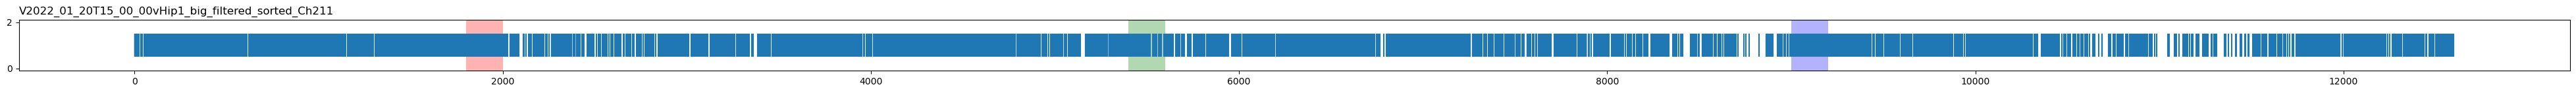

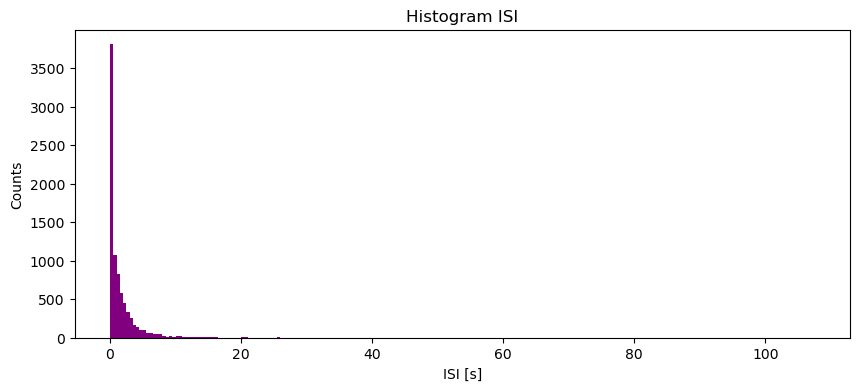

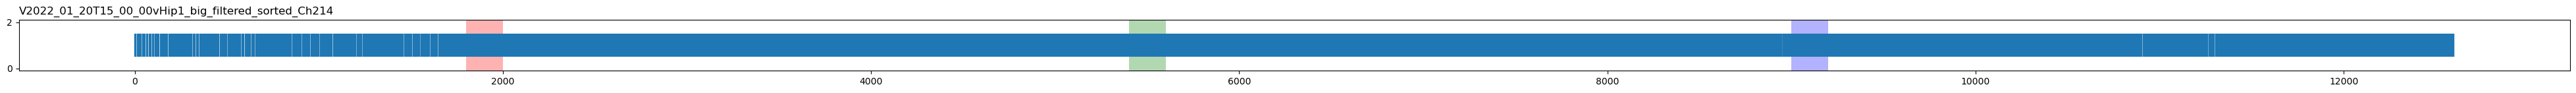

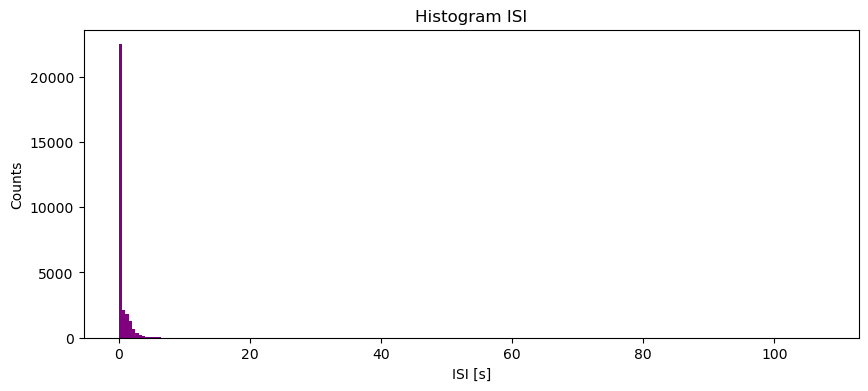

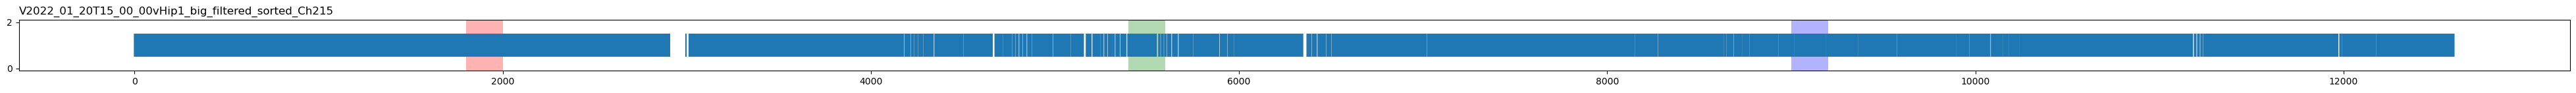

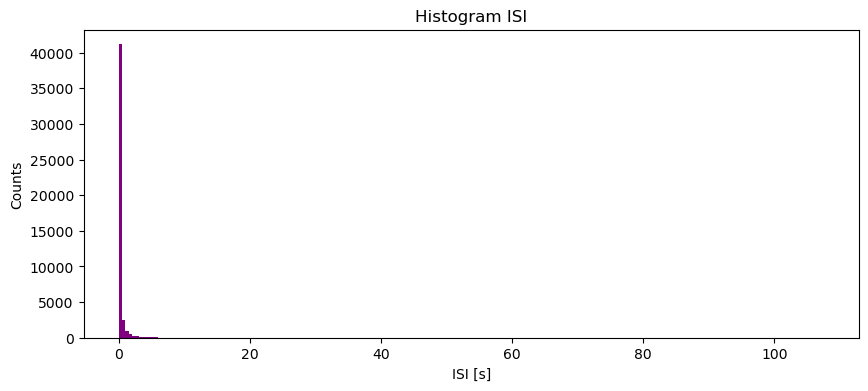

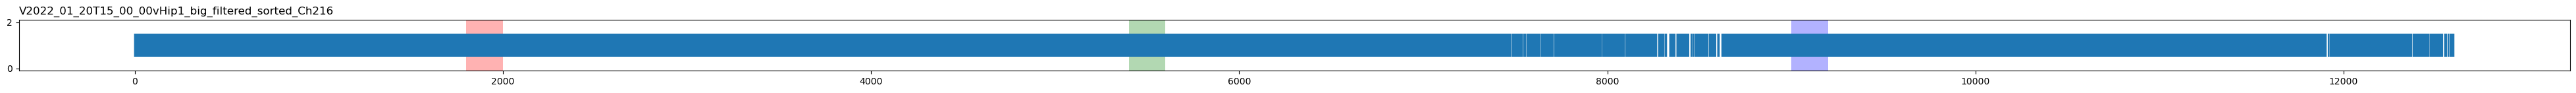

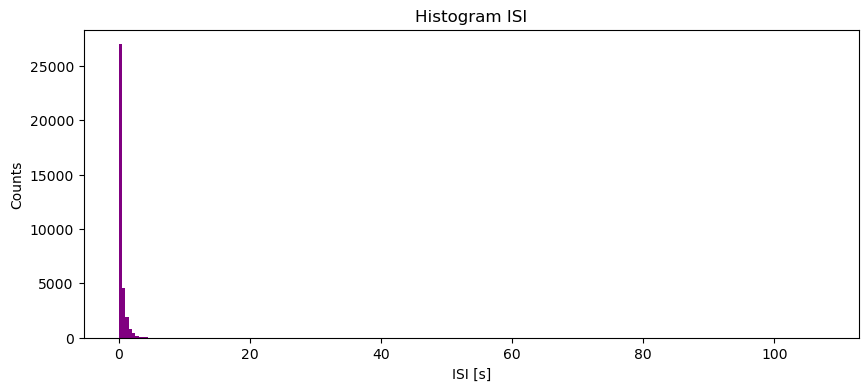

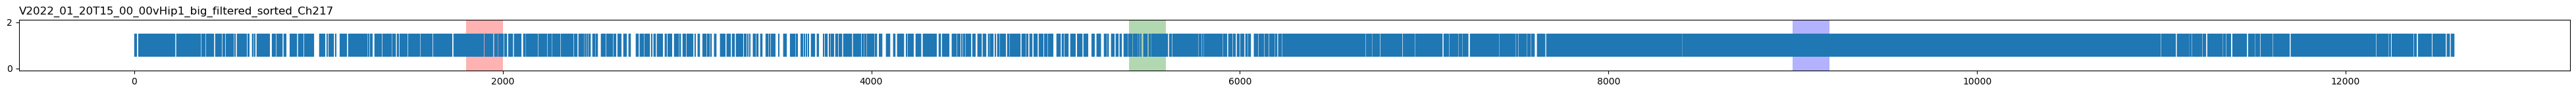

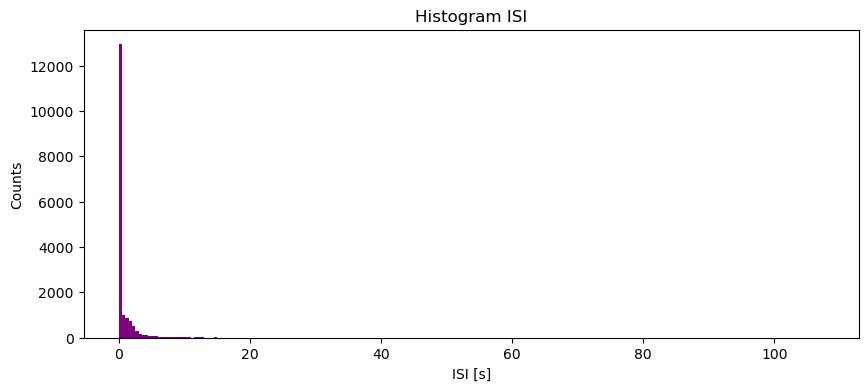

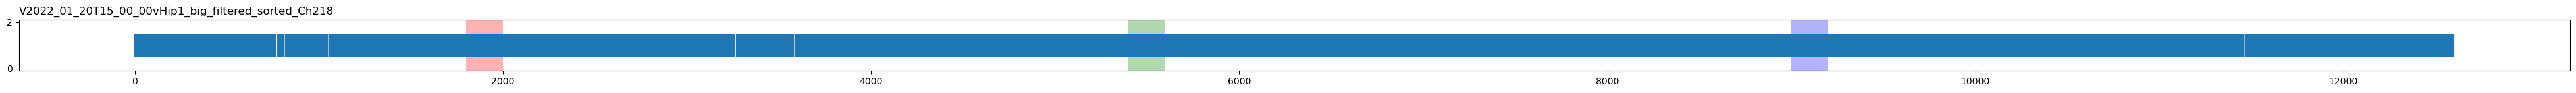

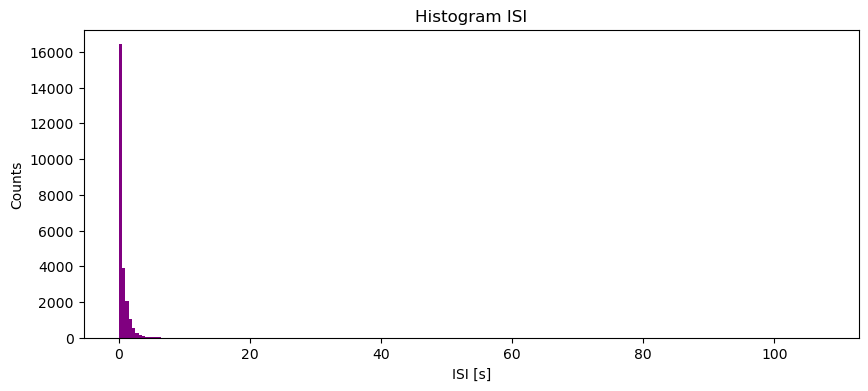

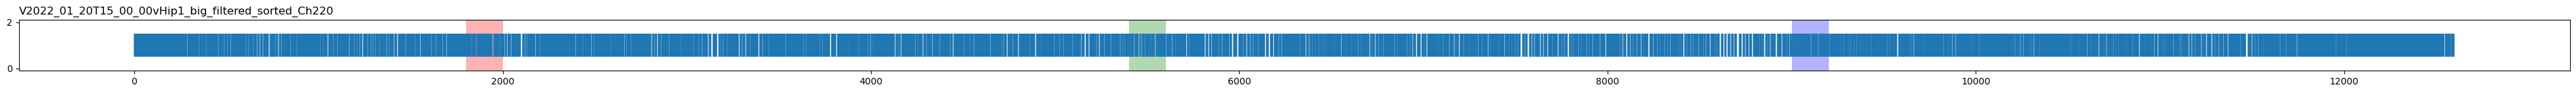

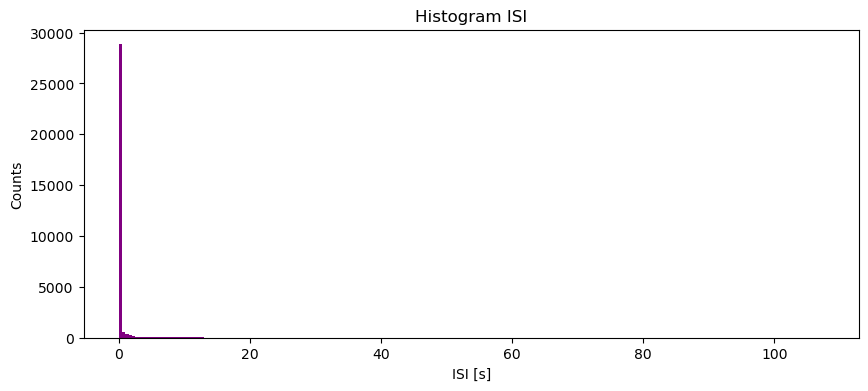

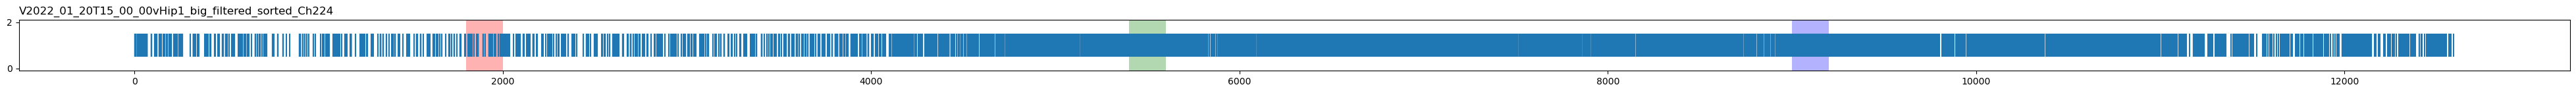

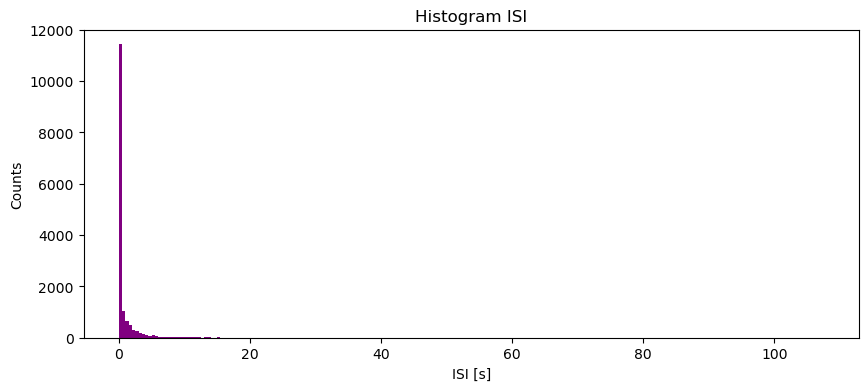

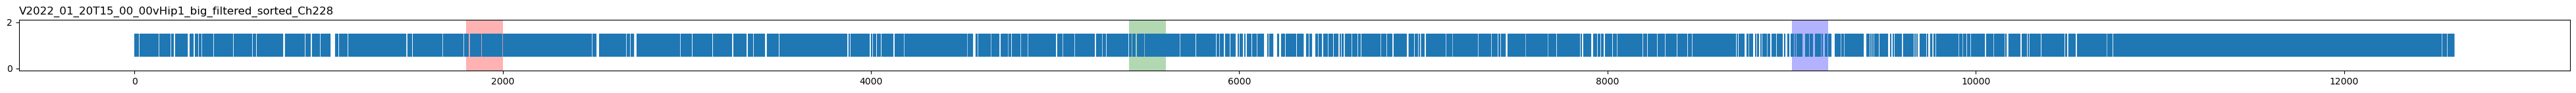

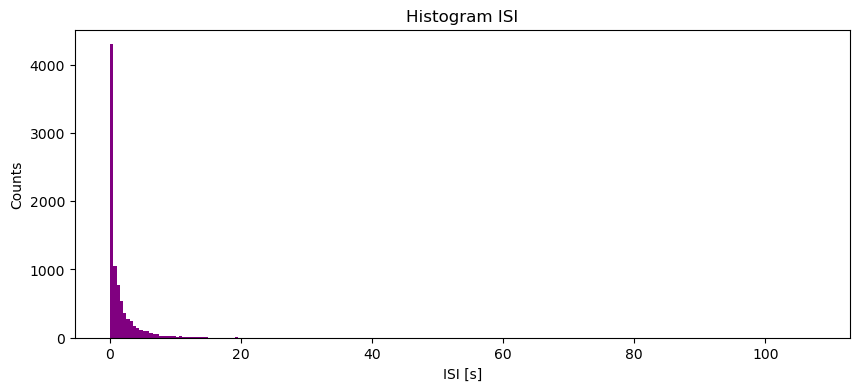

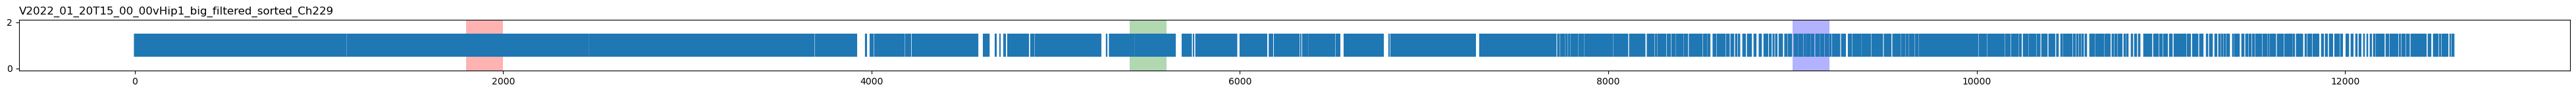

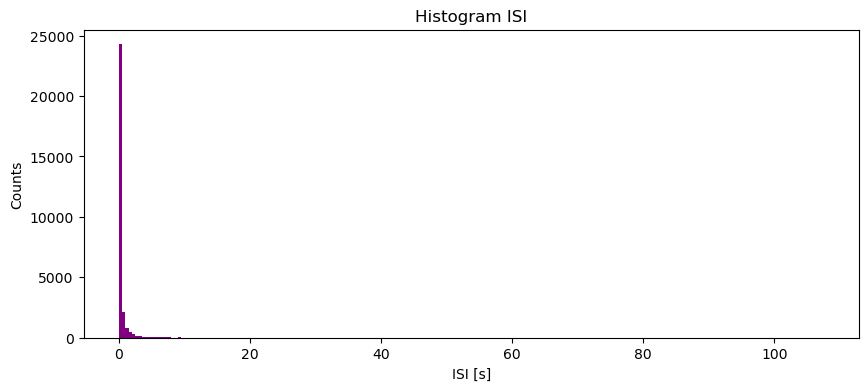

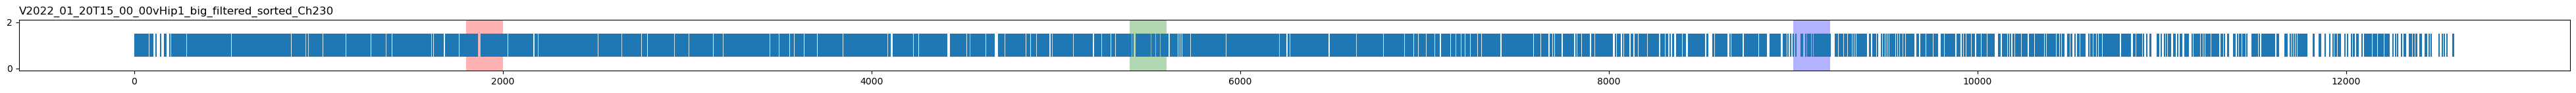

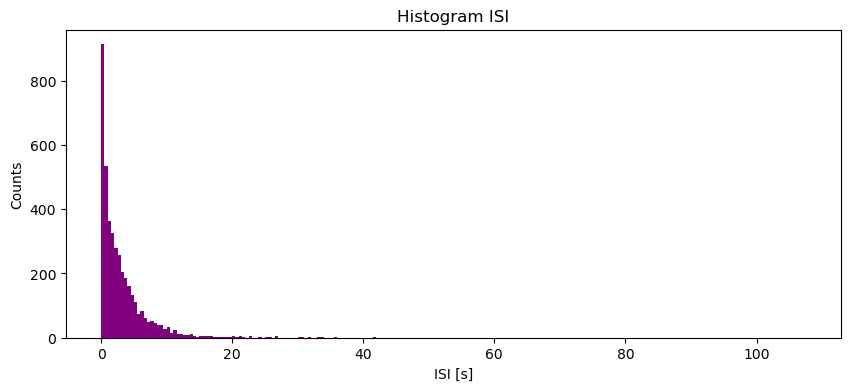

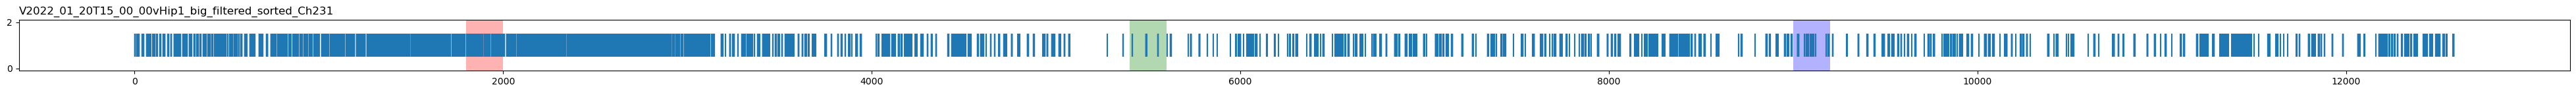

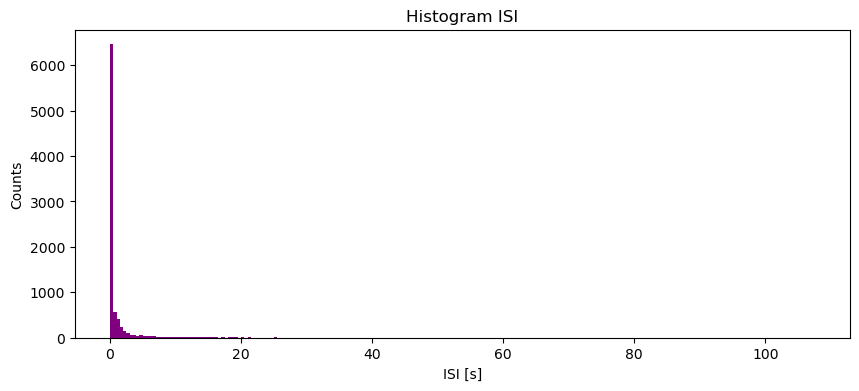

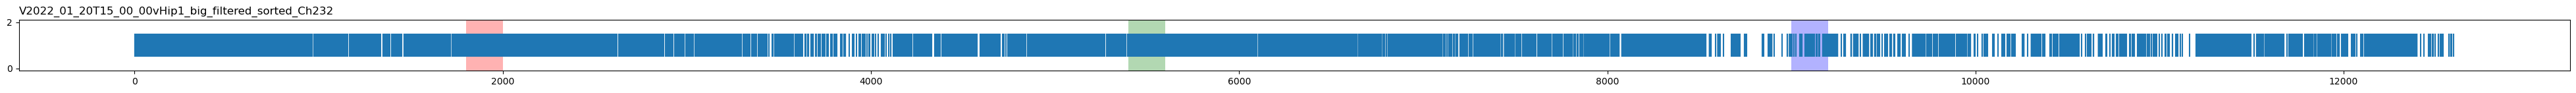

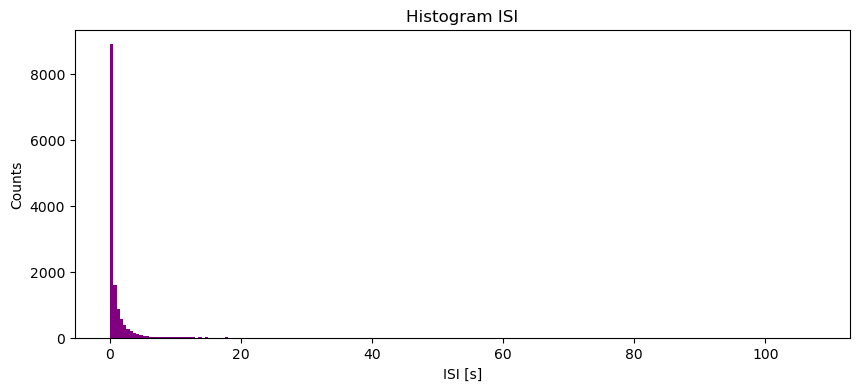

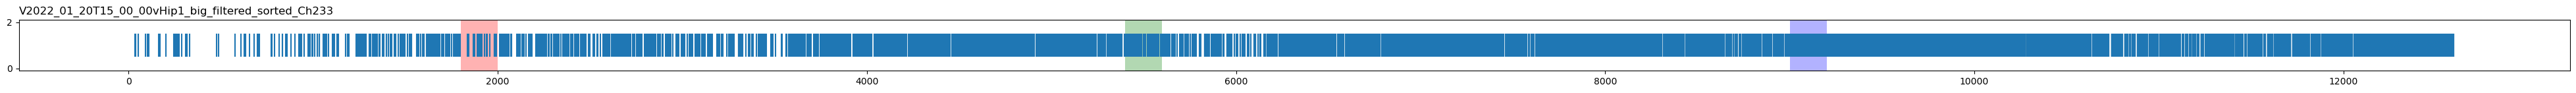

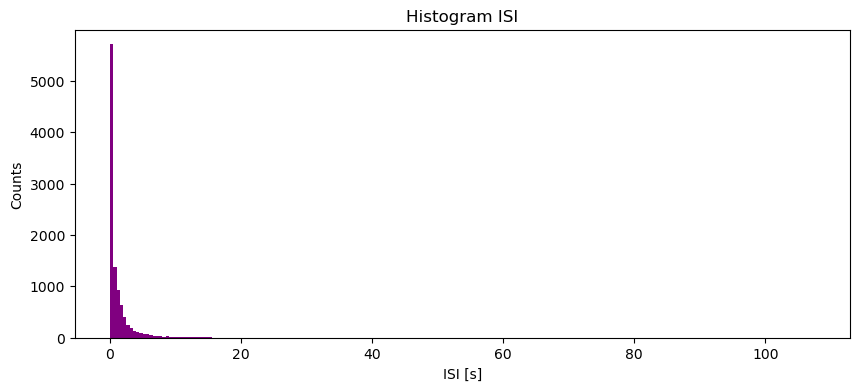

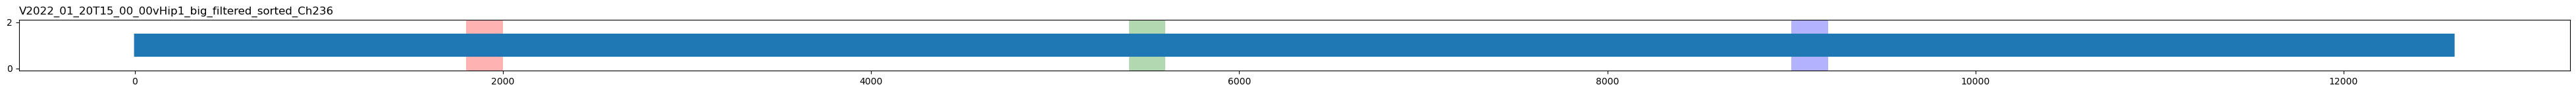

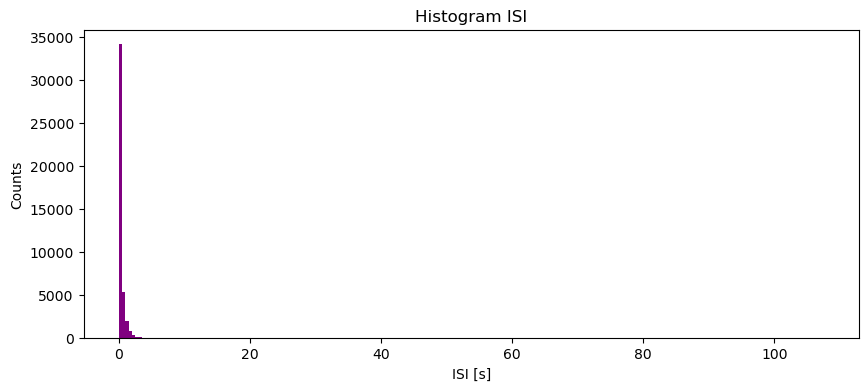

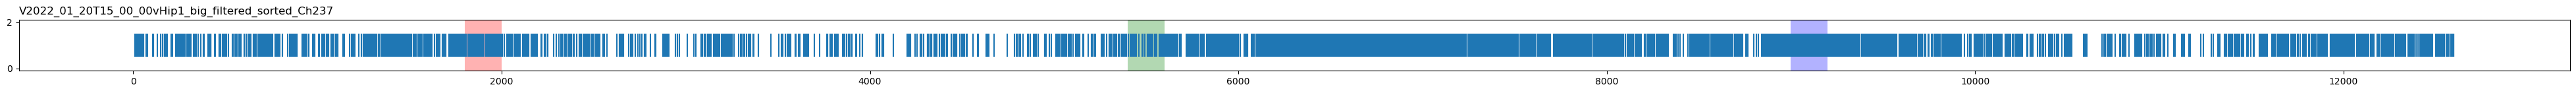

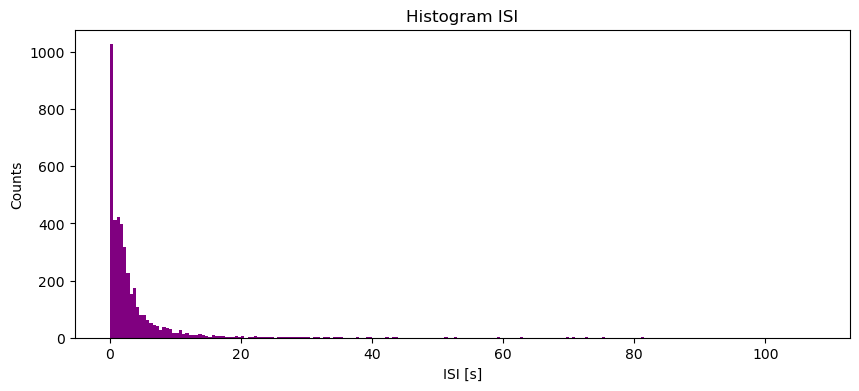

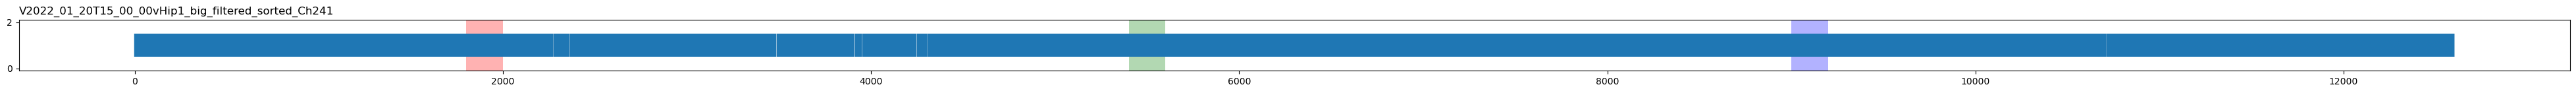

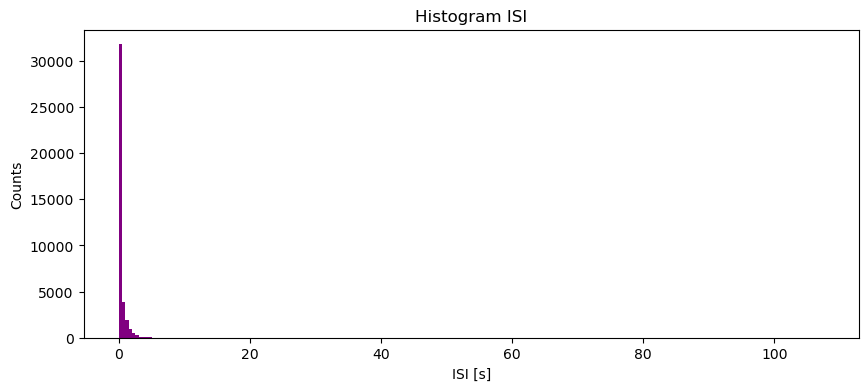

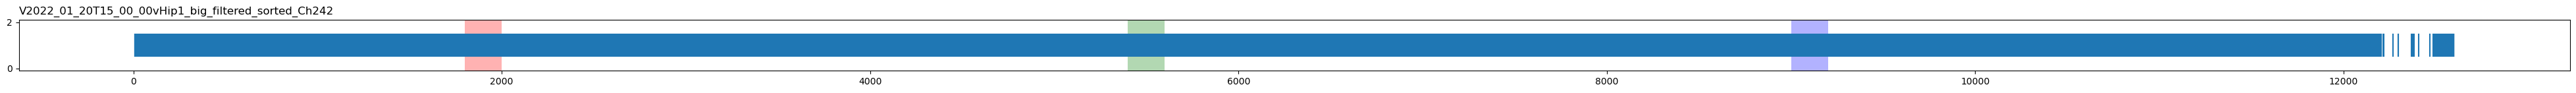

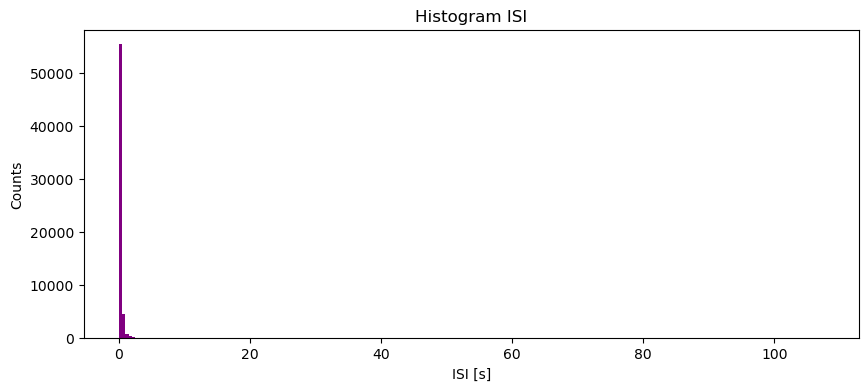

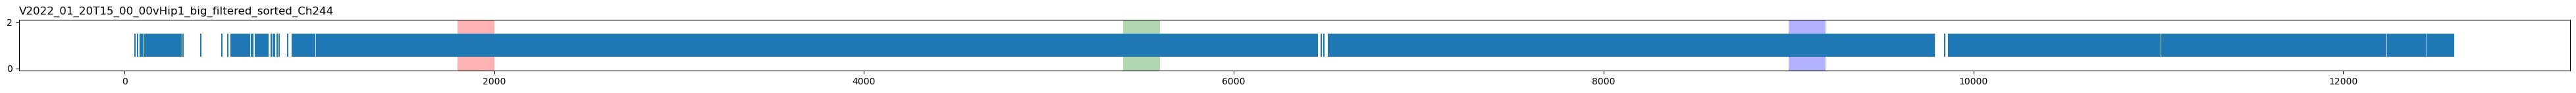

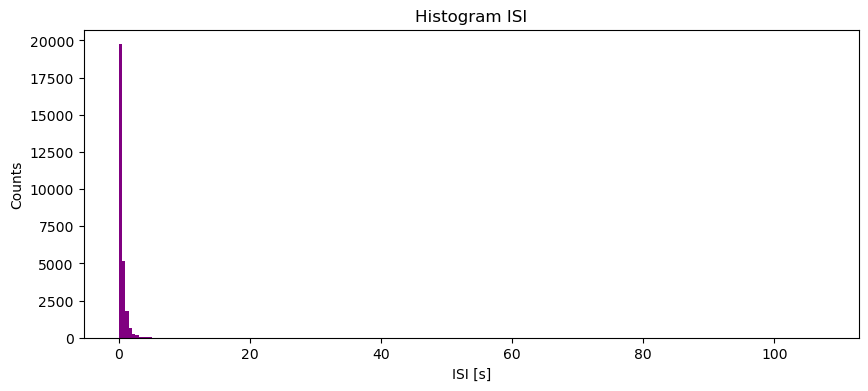

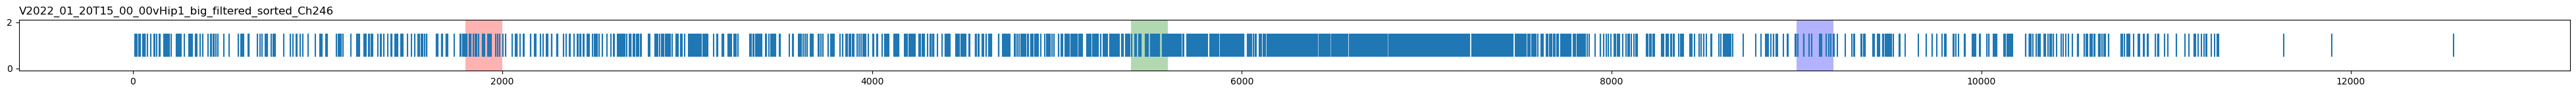

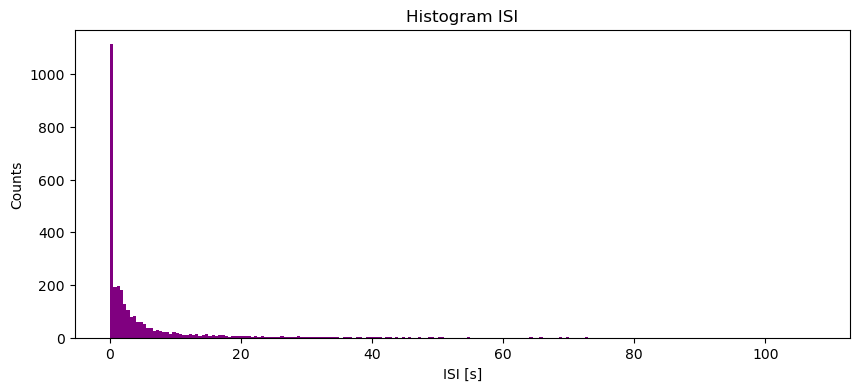

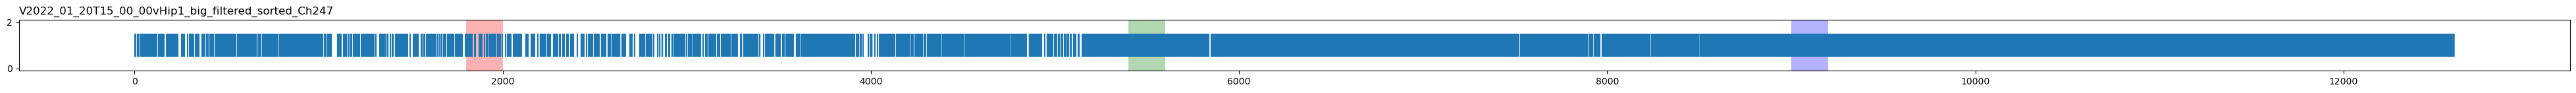

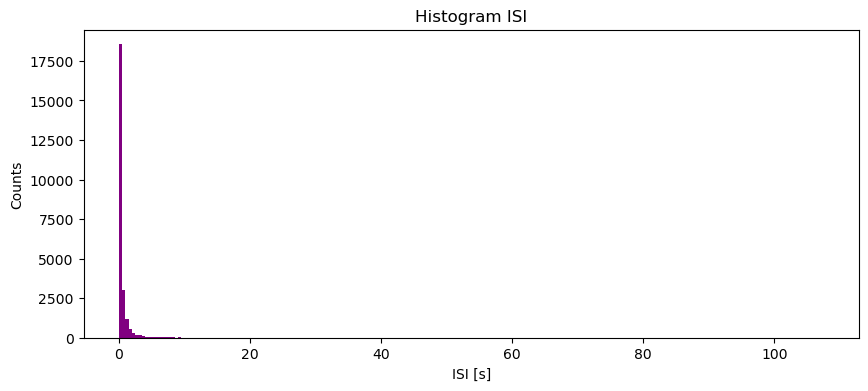

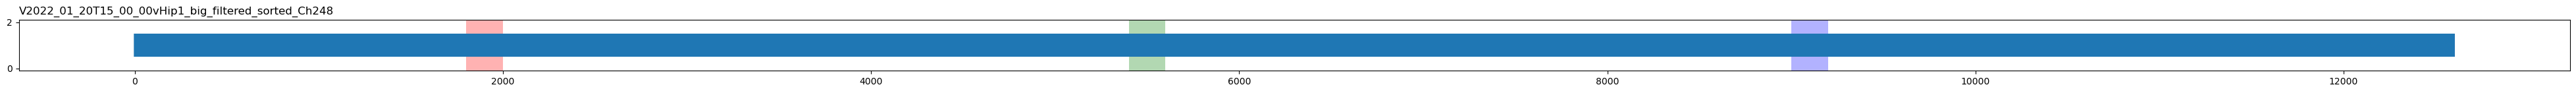

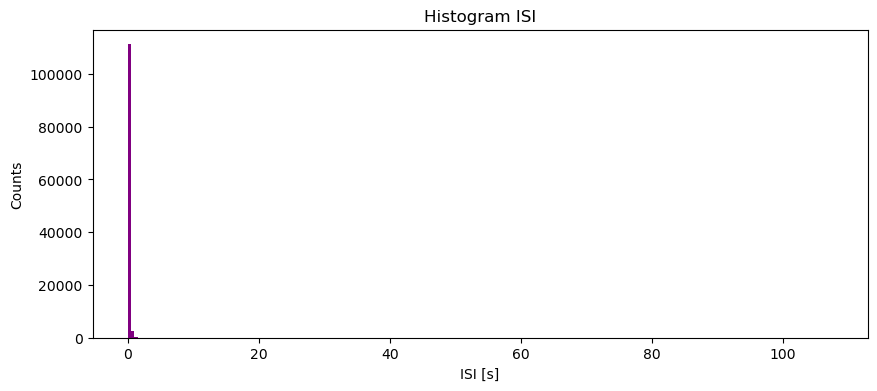

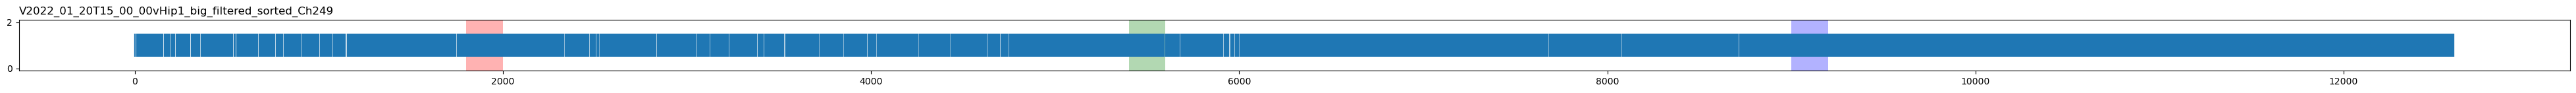

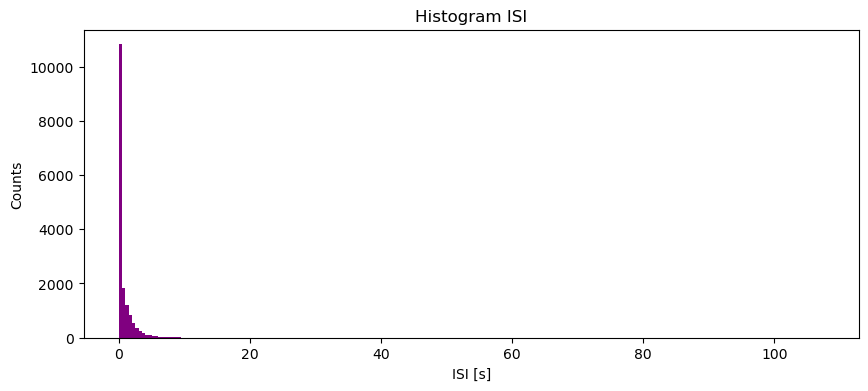

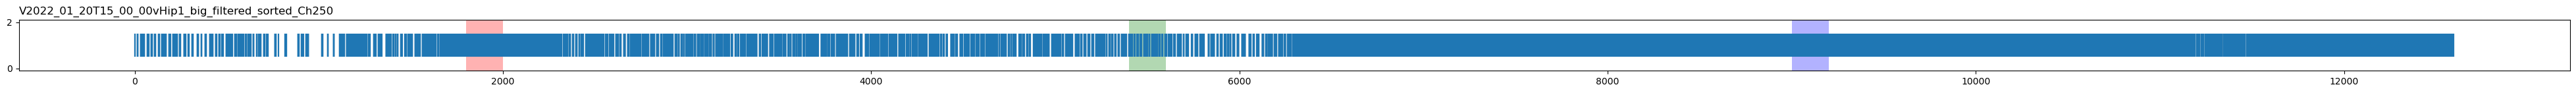

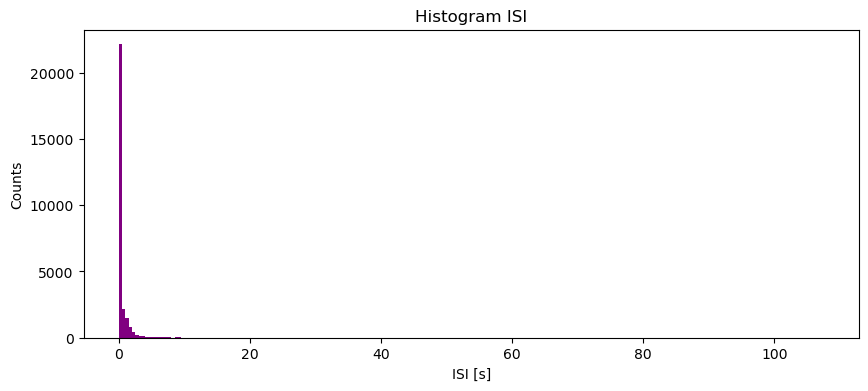

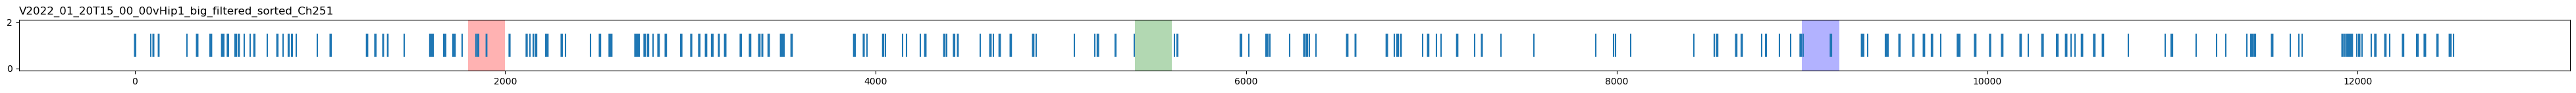

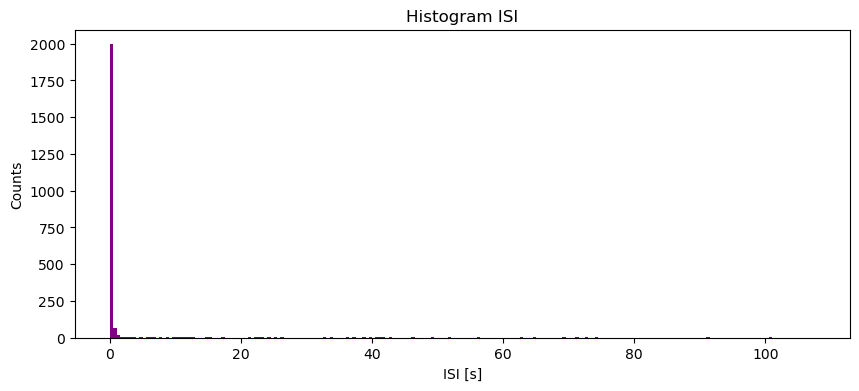

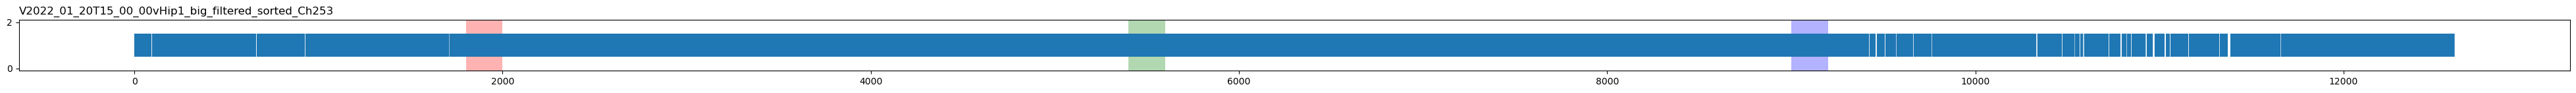

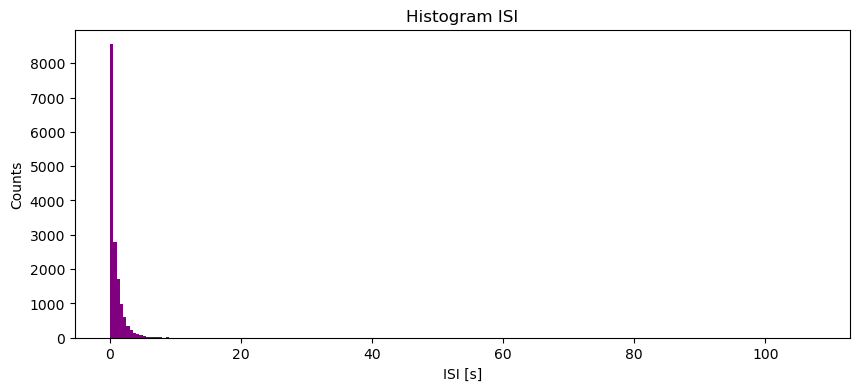

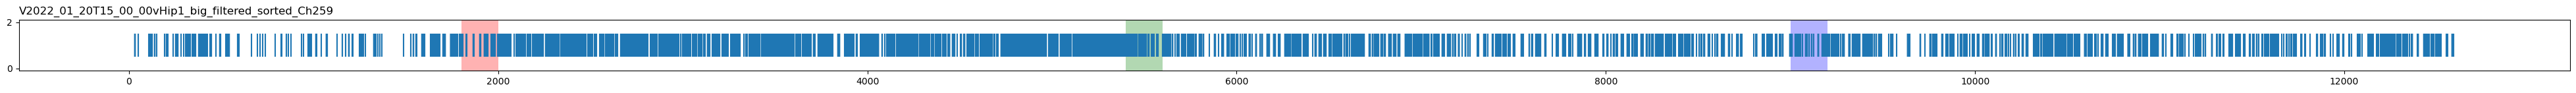

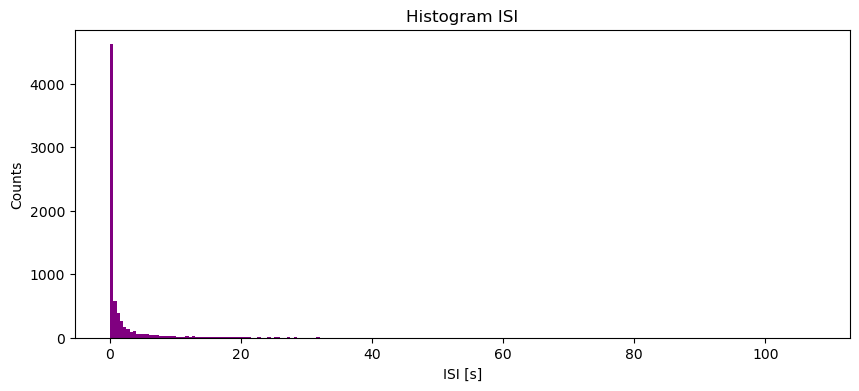

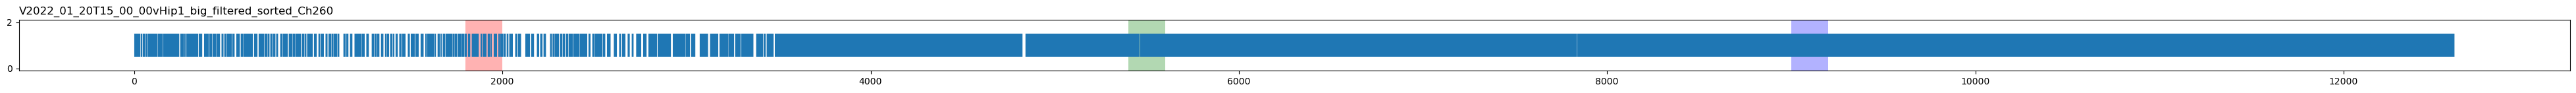

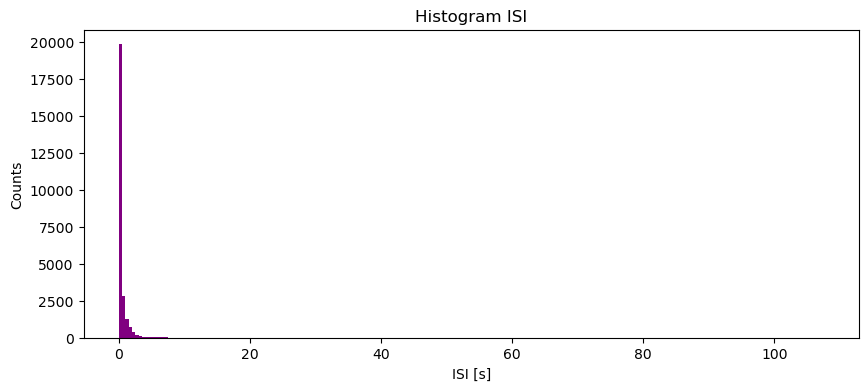

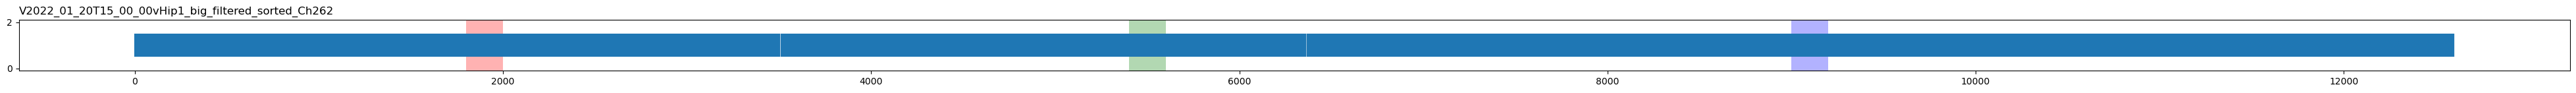

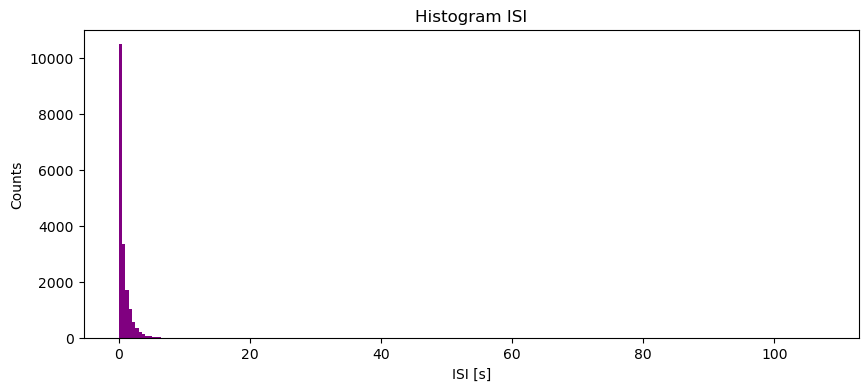

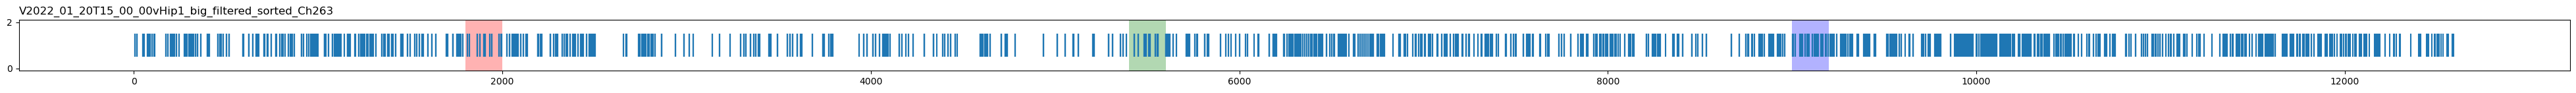

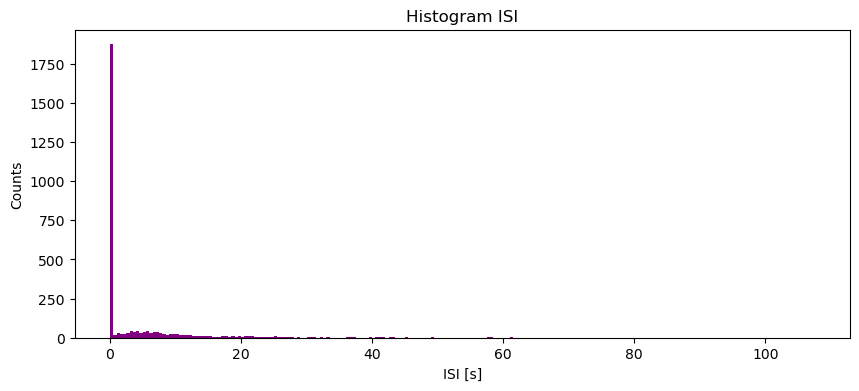

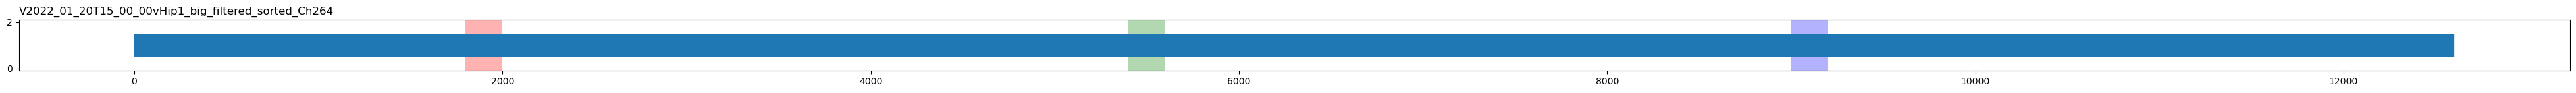

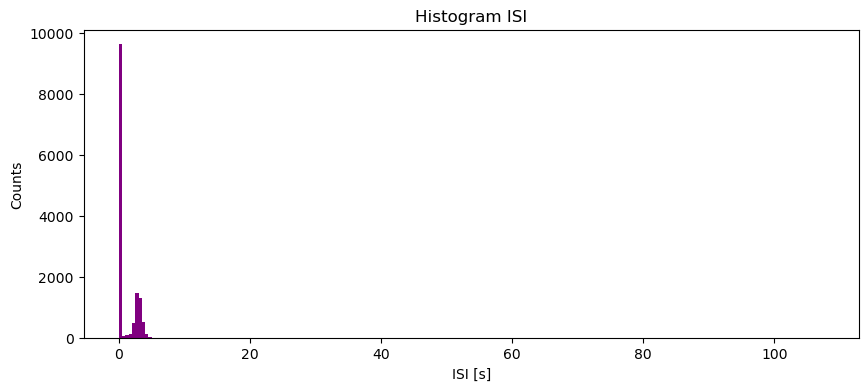

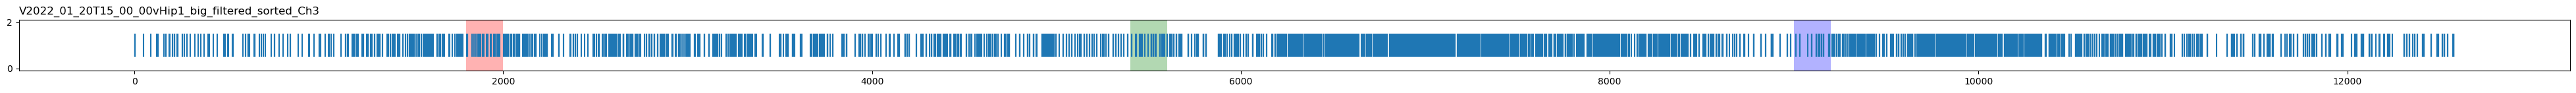

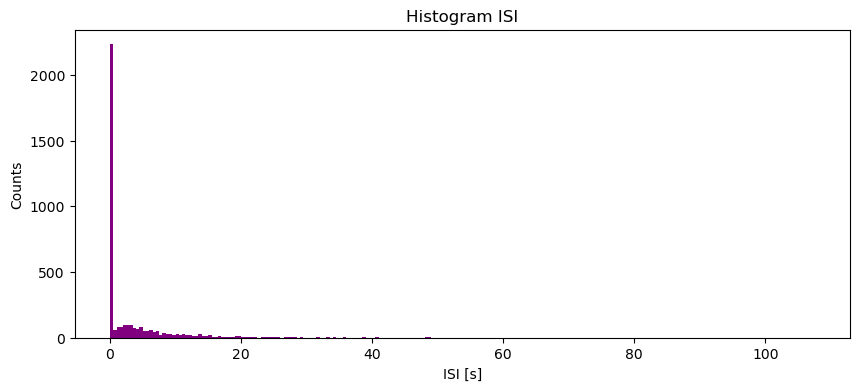

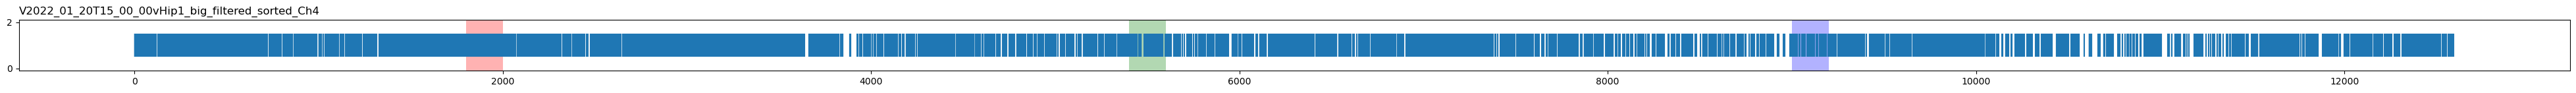

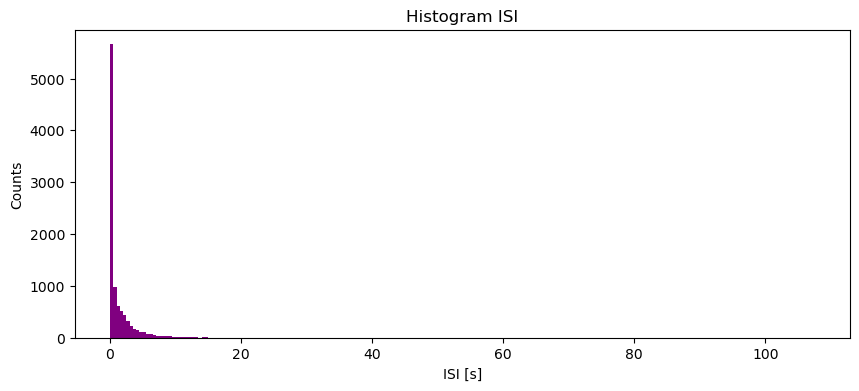

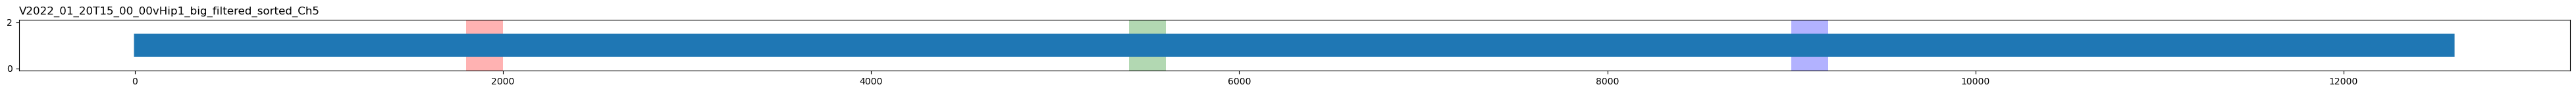

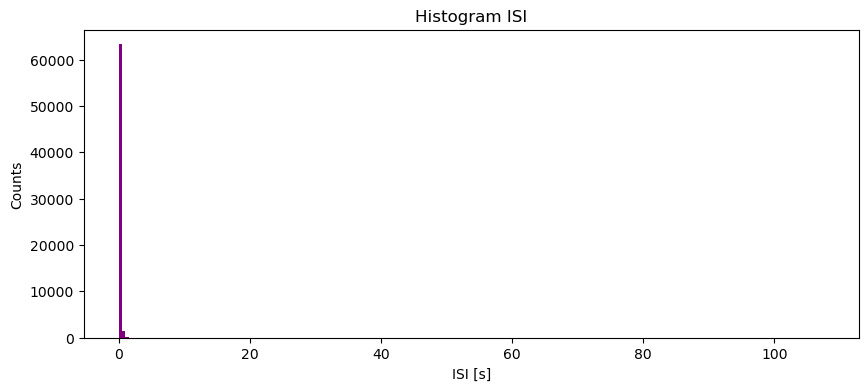

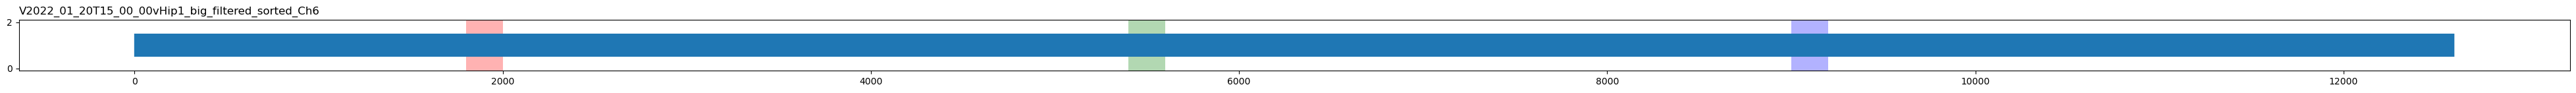

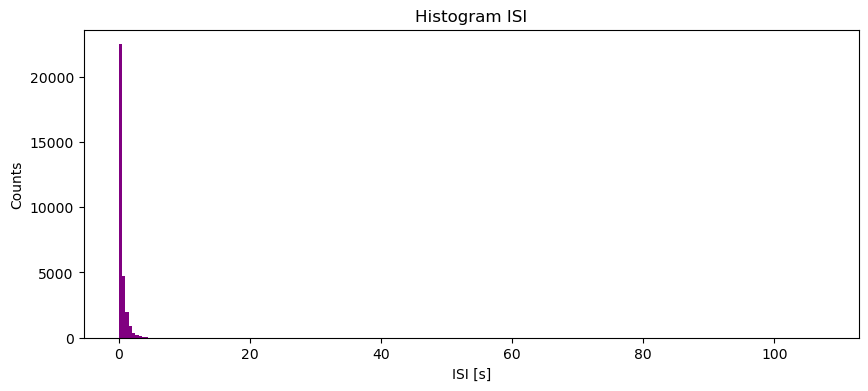

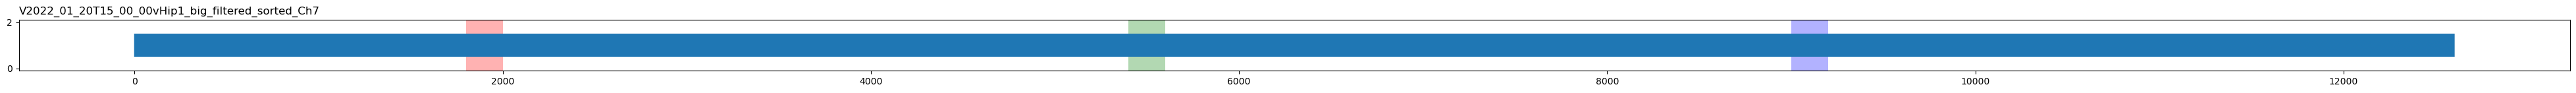

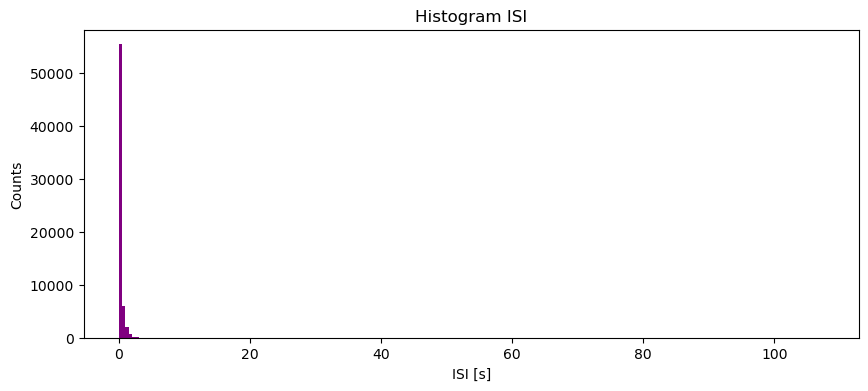

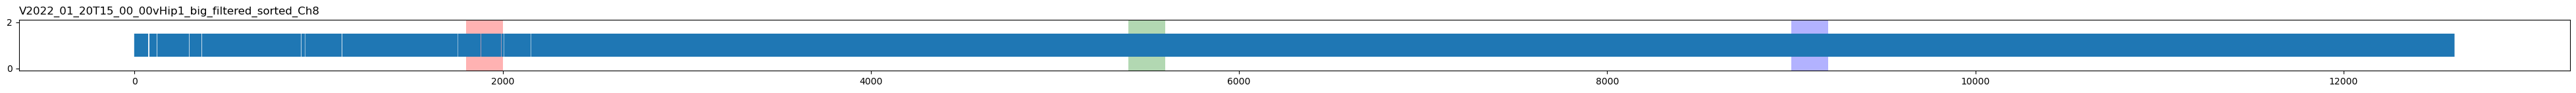

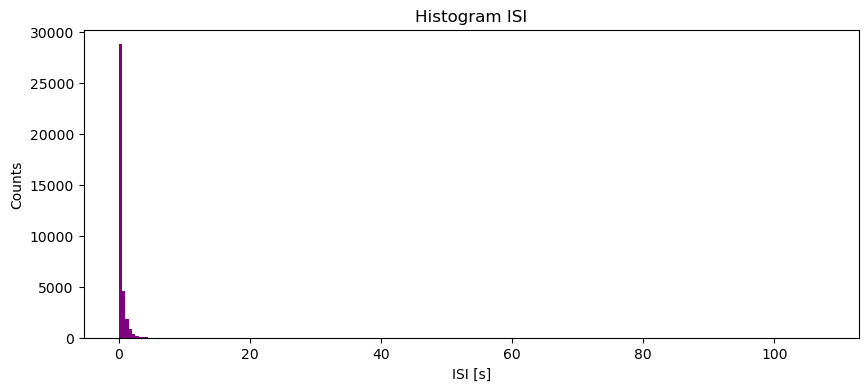

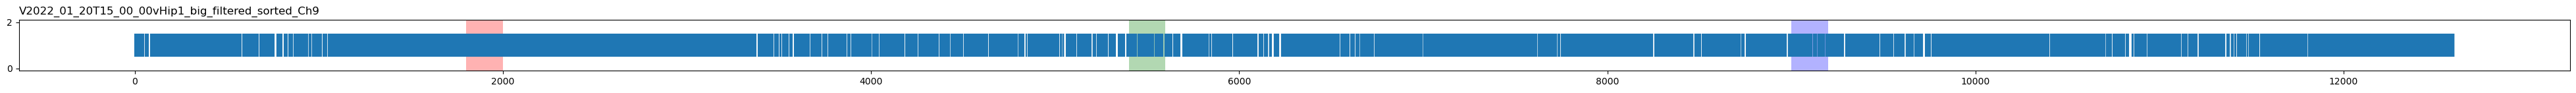

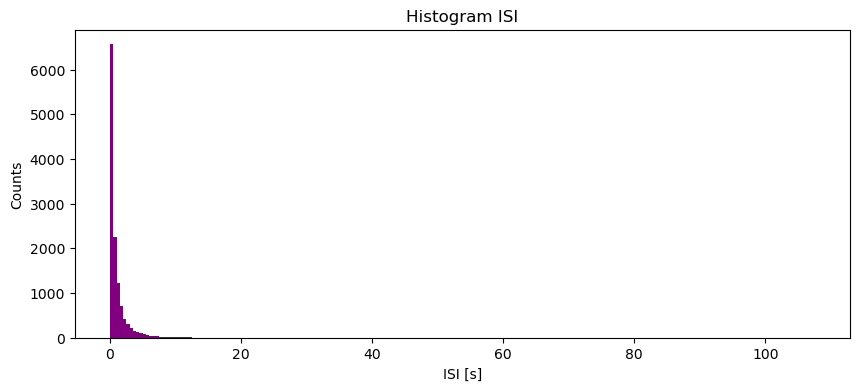

In [5]:
for key in times_dict.keys(): 
    spikes = times_dict[key] # times of the spikes
    plt.rcParams["figure.figsize"] = (50,1)
    plt.eventplot(spikes)
    plt.title(key, loc='left') # names of the channels 
    
    plt.axvspan(1800,2000, facecolor='r', alpha=0.3) #A2 10ml, 1uM
    plt.axvspan(5400,5600, facecolor='g', alpha=0.3) # quinpirole 5ml, 20uM
    plt.axvspan(9000,9200, facecolor='b', alpha=0.3) # quinpirole 5ml, 10uM
    plt.show()
    
    ISIs = np.diff(spikes)
    ISIs_flatten = ISIs.flatten()
    bins = np.arange(0, 108, 0.5)
    plt.figure(figsize=(10, 4))
    plt.hist(ISIs_flatten, bins=bins, color='purple')
    plt.xlabel('ISI [s]')
    plt.ylabel('Counts')
    plt.title('Histogram ISI')
    plt.show()

In [6]:
list(times_dict.keys())

['V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch14',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch2',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch202',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch205',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch206',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch208',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch209',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch211',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch214',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch215',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch216',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch217',
 'V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch218',
 

In [7]:
for key in times_dict.keys():
    spike_times = times_dict[key]
    print(f"Channel {key}:")
    print(f"  - Number of spikes: {size(spike_times)}")
    print(f"  - Mean spike time: {spike_times.mean():.2f}")
    print(f"  - Median spike time: {np.median(spike_times):.2f}")
    print(f"  - Standard deviation: {spike_times.std():.2f}")
    print("-" * 40)


Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1:
  - Number of spikes: 768
  - Mean spike time: 7206.89
  - Median spike time: 7800.19
  - Standard deviation: 3481.48
----------------------------------------
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10:
  - Number of spikes: 21786
  - Mean spike time: 5155.83
  - Median spike time: 5097.57
  - Standard deviation: 2854.72
----------------------------------------
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11:
  - Number of spikes: 49748
  - Mean spike time: 5666.42
  - Median spike time: 5473.05
  - Standard deviation: 3288.43
----------------------------------------
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12:
  - Number of spikes: 74633
  - Mean spike time: 6770.53
  - Median spike time: 6906.56
  - Standard deviation: 3315.90
----------------------------------------
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13:
  - Number of spikes: 11458
  - Mean spike time: 2705.87
  

### ISI (Inter-Spike Interval) - time between two spikes for one neuron

Why this statistic is important for Spiking Neural Network?

SNNs use spikes to process and transmit information, often leveraging the timing between spikes rather than just their rate. Biological neurons exhibit specific firing patterns that influence how they respond to inputs. 


In [8]:
ISIs = np.diff(spikes)
print(ISIs)

[[5.7355  0.08835 0.49075 ... 0.55005 0.0327  0.14745]]


### Data preparing

In [45]:
import pandas as pd
import numpy as np

# Parametry
max_time = 1800  # Maksymalny czas (s)
time_step = 0.001  # Długość jednego bucketa (s)

# 1. Przycinanie danych do 1800 sekund
trimmed_times_dict = {}
for neuron_id, spike_times in times_dict.items():
    # Upewniamy się, że dane są jednowymiarowe i płaskie
    spike_times = np.asarray(spike_times).flatten()  # Przekształcamy w jednowymiarową tablicę
    trimmed_times_dict[neuron_id] = spike_times[spike_times <= max_time].tolist()  
    
# 2. Tworzenie osi czasu
time_buckets = np.arange(0, max_time + time_step, time_step)  # Oś czasu od 0 do 1800 co 0.01s

# 3. Tworzenie DataFrame
spike_matrix = pd.DataFrame(index=time_buckets, columns=trimmed_times_dict.keys(), data=0)

# 4. Uzupełnianie macierzy spike'ów zerami i jedynkami
for neuron_id, spike_times in trimmed_times_dict.items():

    spike_indices = np.searchsorted(time_buckets, spike_times)  #indeksy bucketów dla spike'ów
    spike_indices = spike_indices[spike_indices < len(time_buckets)]  #indeksy mieszczą się w zakresie?
    spike_matrix.iloc[spike_indices, spike_matrix.columns.get_loc(neuron_id)] = 1  # 1 dla spike'ów

# Resetujemy indeks, aby oś czasu była kolumną "Time"
spike_matrix.reset_index(inplace=True)
spike_matrix.rename(columns={"index": "Time"}, inplace=True)

# 5. Zapisujemy wynik do pliku CSV
spike_matrix.to_csv('spike_matrix.csv', index=False)
print("Macierz spike'ów została zapisana do pliku 'spike_matrix.csv'.")


Macierz spike'ów została zapisana do pliku 'spike_matrix.csv'.


In [46]:
df = pd.read_csv("spike_matrix.csv", index_col=False)

In [47]:
df

,Time,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch14,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch2,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch202,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch205,...,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch262,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch263,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch264,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch3,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch4,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch5,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch6,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch7,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch8,V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch9
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799996,1799.996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799997,1799.997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799998,1799.998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1799999,1799.999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Obliczamy sumę każdej kolumny (pomijamy kolumnę "Time")
column_sums = spike_matrix.drop(columns=["Time"]).sum()
column_sums

V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1         74
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10      3187
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11      7227
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12      5577
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13      4114
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch14       103
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch2        102
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch202     2063
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch205      483
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch206       33
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch208       11
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch209     1408
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch211     1718
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch214     2474
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch215     7870
V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch216     4814
V2022_01_20T15_00_00vHip

In [49]:
i = 0
for key in trimmed_times_dict.keys():
    print(i)
    spike_times = trimmed_times_dict[key]
    print(f"Channel {key}:")
    print(f"  - Actua number of spikes: {size(spike_times)}")
    print(f"  - Number of spikes in df: {column_sums[i]}")
    print(f"  - Difference: {size(spike_times)-column_sums[i]}")

    print("-" * 40)
    i=i+1

0
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch1:
  - Actua number of spikes: 74
  - Number of spikes in df: 74
  - Difference: 0
----------------------------------------
1
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch10:
  - Actua number of spikes: 3188
  - Number of spikes in df: 3187
  - Difference: 1
----------------------------------------
2
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch11:
  - Actua number of spikes: 7229
  - Number of spikes in df: 7227
  - Difference: 2
----------------------------------------
3
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch12:
  - Actua number of spikes: 5579
  - Number of spikes in df: 5577
  - Difference: 2
----------------------------------------
4
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch13:
  - Actua number of spikes: 4114
  - Number of spikes in df: 4114
  - Difference: 0
----------------------------------------
5
Channel V2022_01_20T15_00_00vHip1_big_filtered_sorted_Ch14:
  - Actu

/var/folders/6y/g2p2w1qs6zs509fmkdpp5b4m0000gn/T/ipykernel_47588/3661663726.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  - Number of spikes in df: {column_sums[i]}")
/var/folders/6y/g2p2w1qs6zs509fmkdpp5b4m0000gn/T/ipykernel_47588/3661663726.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"  - Difference: {size(spike_times)-column_sums[i]}")


In [50]:
df.shape

(1800001, 51)